In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.api.types import is_numeric_dtype, is_datetime64_dtype
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
data_folder = 'data/'
listings = pd.read_csv(data_folder + 'listings.csv')
reviews = pd.read_csv(data_folder + 'reviews.csv')
calendar = pd.read_csv(data_folder + 'calendar.csv')
neighborhoods = pd.read_csv(data_folder + 'neighbourhoods.csv')

In [3]:
listings.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
access                               object
interaction                          object
house_rules                          object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                      

In [4]:
listings.loc[0]

id                                                                           20872145
listing_url                                     https://www.airbnb.com/rooms/20872145
scrape_id                                                              20171005235014
last_scraped                                                               2017-10-06
name                                                      Charming Boston Residential
summary                             Berber carpeting. The living room has two full...
space                                                       It's on the second floor.
description                         Berber carpeting. The living room has two full...
experiences_offered                                                              none
neighborhood_overview               Roslindale is an amazing up and coming town in...
notes                                                                             NaN
transit                             Public transportat

In [5]:
date_columns = ['first_review', 'last_review', 'calendar_last_scraped', 'host_since', 'last_scraped']
for col in date_columns:
    if not is_datetime64_dtype(listings[col]):
        listings[col] = pd.to_datetime(listings[col])
price_columns = ['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']
for col in price_columns:
    if not is_numeric_dtype(listings[col]):
        listings[col] = listings[col].str.replace('$', '')
        listings[col] = listings[col].str.replace(',', '')
        listings[col] = listings[col].astype(np.float64)
listings['amenities'] = listings['amenities'].apply(lambda x: x.replace('"', '').replace('{', '').replace('}', '').split(','))

In [6]:
listings.loc[0]['first_review']

Timestamp('2017-09-16 00:00:00')

In [7]:
listings['amenities']

0       [Wireless Internet, Gym, Heating, Smoke detect...
1       [Wireless Internet, Air conditioning, Kitchen,...
2       [Internet, Wireless Internet, Air conditioning...
3       [TV, Cable TV, Internet, Wireless Internet, Ai...
4       [Wireless Internet, Air conditioning, Kitchen,...
5       [Internet, Wireless Internet, Air conditioning...
6       [TV, Cable TV, Internet, Wireless Internet, Ai...
7       [Wireless Internet, Air conditioning, Kitchen,...
8       [TV, Wireless Internet, Air conditioning, Kitc...
9       [TV, Cable TV, Internet, Wireless Internet, Ai...
10      [Cable TV, Wireless Internet, Air conditioning...
11      [TV, Internet, Wireless Internet, Air conditio...
12      [TV, Wireless Internet, Kitchen, Breakfast, He...
13      [TV, Internet, Wireless Internet, Air conditio...
14      [TV, Cable TV, Internet, Wireless Internet, Ki...
15      [TV, Wireless Internet, Kitchen, Breakfast, He...
16      [TV, Internet, Wireless Internet, Air conditio...
17      [TV, W

In [8]:
listings.describe()

,id,scrape_id,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,4.870000e+03,4.870000e+03,4.870000e+03,0.0,4870.000000,4870.000000,0.0,4870.000000,4870.000000,4870.000000,...,3936.000000,3941.000000,3928.000000,3940.000000,3927.000000,3927.000000,0.0,0.0,4870.000000,3986.000000
mean,1.293651e+07,2.017101e+13,4.088556e+07,NaN,78.667351,78.667351,NaN,42.339999,-71.083943,3.298152,...,9.588923,9.443035,9.742617,9.713706,9.487395,9.334861,NaN,NaN,19.301848,2.204792
std,6.202199e+06,0.000000e+00,3.971610e+07,NaN,219.284219,219.284219,NaN,0.025338,0.032768,2.131683,...,0.773592,0.957797,0.685026,0.722654,0.822990,0.890983,NaN,NaN,43.029043,2.336672
min,3.781000e+03,2.017101e+13,4.240000e+03,NaN,0.000000,0.000000,NaN,42.235760,-71.179257,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,NaN,1.000000,0.020000
25%,7.913572e+06,2.017101e+13,1.011587e+07,NaN,1.000000,1.000000,NaN,42.329070,-71.105007,2.000000,...,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,NaN,1.000000,0.450000
50%,1.431376e+07,2.017101e+13,2.695608e+07,NaN,2.000000,2.000000,NaN,42.345512,-71.077124,2.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.300000
75%,1.857908e+07,2.017101e+13,6.297457e+07,NaN,11.000000,11.000000,NaN,42.356009,-71.061114,4.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,9.000000,3.247500
max,2.123117e+07,2.017101e+13,1.533133e+08,NaN,982.000000,982.000000,NaN,42.396191,-70.985047,16.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,181.000000,15.100000


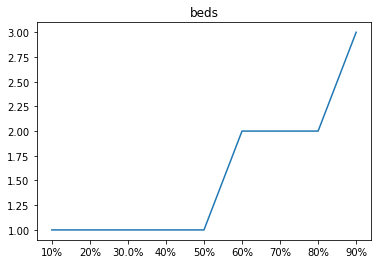

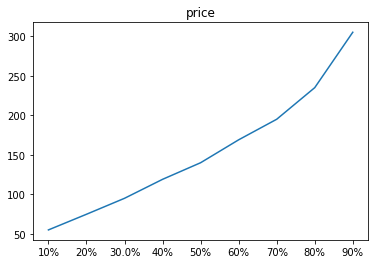

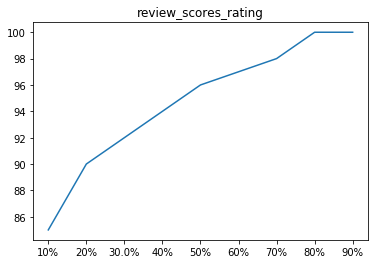

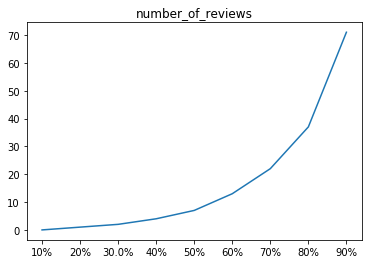

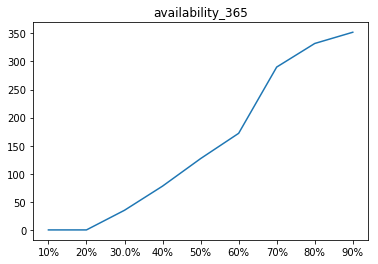

In [9]:
summary_cols = ['beds', 'price', 'review_scores_rating', 'number_of_reviews', 'availability_365']
for col in summary_cols:
    listings[col].describe(percentiles=list(np.arange(0.1,1,0.1)))[4:-1].plot()
    plt.title(col)
    plt.show()

In [10]:
import statsmodels.api as sm

def chart4(df, x, y):
    fig = plt.figure(figsize=(6,4))
    X = df[x]
    Y = df[y]
    X = sm.add_constant(X)
    model = sm.OLS(Y, X)
    results = model.fit()
    label = 'R2: ' + str(results.rsquared)
    plt.scatter(x=df[x], y=df[y])
    xspace = np.linspace(df[x].min(), df[x].max())
    yhat = results.params[1] * xspace + results.params[0]
    plt.plot(xspace, yhat, 'r--')
    ax = plt.gca()
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    fig.tight_layout()
    return

/home/bdice/anaconda3/envs/dice/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [11]:
listings['review_scores_rating_pct'] = listings['review_scores_rating'].rank(pct=True)

/home/bdice/anaconda3/envs/dice/lib/python3.6/site-packages/numpy/linalg/linalg.py:1574: RuntimeWarning: invalid value encountered in greater
  return (S > tol).sum(axis=-1)


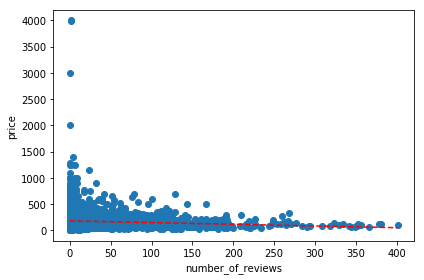

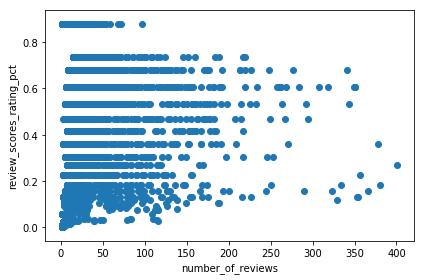

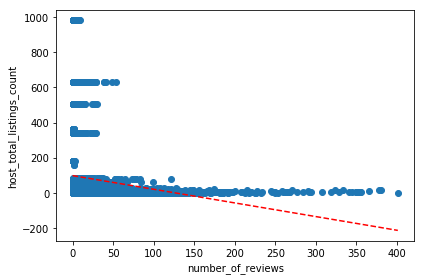

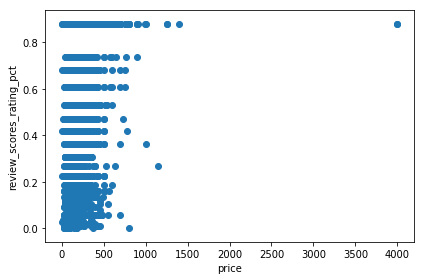

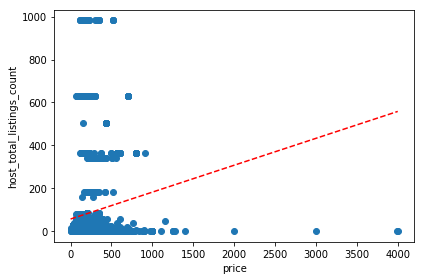

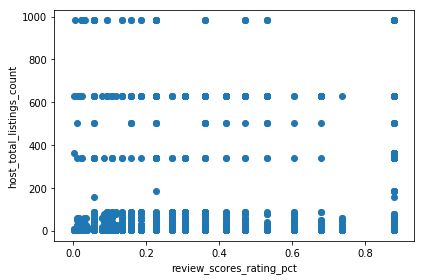

In [12]:
from itertools import combinations
corr_vars = ['number_of_reviews', 'price', 'review_scores_rating_pct', 'host_total_listings_count']
for pair in combinations(corr_vars, 2):
    chart4(listings, pair[0], pair[1])

In [13]:
listings['review_scores_rating_pct'].describe()

count    3944.000000
mean        0.500127
std         0.286380
min         0.001268
25%         0.225913
50%         0.531947
75%         0.736942
max         0.880071
Name: review_scores_rating_pct, dtype: float64

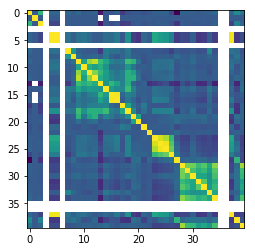

In [14]:
plt.imshow(listings.corr())

In [15]:
ratings_df = listings.loc[:, ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                              'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                              'review_scores_value']]

In [16]:
def labeled_corr(dfcorr):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    cax = ax.imshow(dfcorr)
    ax.set_xticks(range(len(dfcorr.columns)))
    ax.set_yticks(range(len(dfcorr.columns)))
    labels = [item.get_text() for item in ax.get_xticklabels()]
    for i in range(len(dfcorr.columns)):
        labels[i] = dfcorr.columns[i]

    ax.set_xticklabels(labels, rotation='vertical')
    ax.set_yticklabels(labels)
    cbar = fig.colorbar(cax)

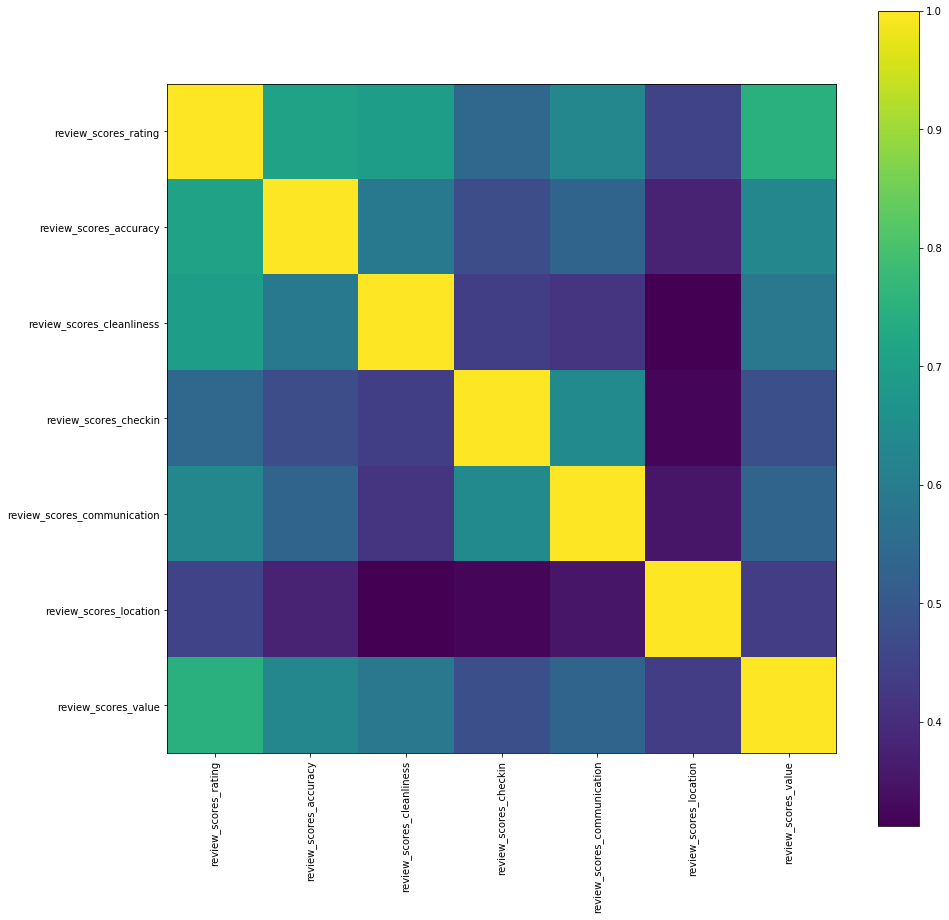

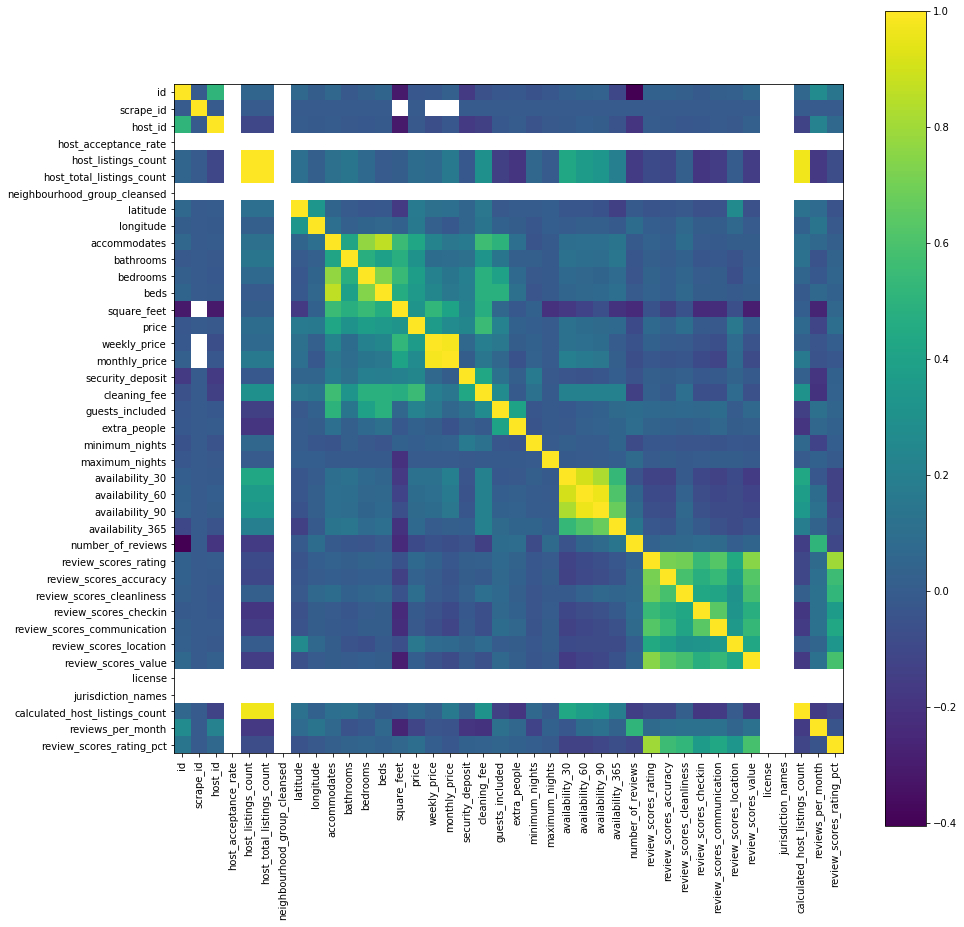

In [17]:
labeled_corr(ratings_df.corr())
labeled_corr(listings.corr())

In [18]:
import matplotlib
import cartopy.io.img_tiles as cimgt

def make_map(df, column, vmin=0, vmax=100):
    cmap = matplotlib.cm.viridis
    fig = plt.figure(figsize=(12,12), facecolor='white')
    ax = fig.add_subplot(111)
    tiler = cimgt.OSM()
    mercator = tiler.crs
    ax = plt.axes(projection=mercator)
    ax.set_extent([df['longitude'].min(), df['longitude'].max(),
                   df['latitude'].min(), df['latitude'].max()])
    ax.add_image(tiler, 12)
    #plt.scatter(listings['longitude'], listings['latitude'], color='red', marker='o', s=10)
    s = ax.scatter(df['longitude'], df['latitude'], marker='o', c=df[column],
                   vmin=vmin, vmax=vmax, cmap=cmap, s=50, alpha=0.5, transform=mercator.as_geodetic())
    fig.colorbar(s)
    plt.show()

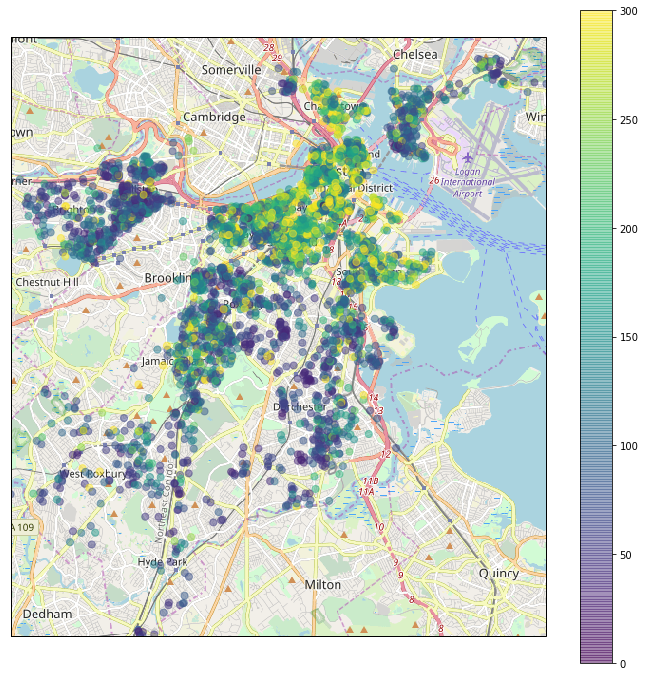

In [19]:
make_map(listings, 'price', 0, 300)

In [20]:
listings.loc[0, 'description']

"Berber carpeting. The living room has two fully stocked bookshelves, a glass coffee table with a small leather couch, two ottoman/end tables, a closet, and end table/decor stand. The kitchen includes a fridge, freezer, self-cleaning oven, gas stove top and sink, with a patio view/access point and indoor plants around the dinning area. The bathroom is tile covered with a porcelain bathtub, beautiful vanity mirror and low hanging lights. Boston is a college town, Welcome All. It's on the second floor. You have access to the bathroom, livingroom, kitchen and the guest closet. You also have access to the community center/business conference center, the gym and the community gardens. I work full time and will be at the space in the evening and on the weekends. I'm pretty quite, and spend most of my free time at the gym or writing. Roslindale is an amazing up and coming town in the Boston area. It's easy access to the Metro area makes it ideal for working professionals, students and familie

In [21]:
from textblob import TextBlob
for i in range(100):
    blob = TextBlob(listings.loc[i, 'description'])
    for sentence in blob.sentences:
        if(sentence.sentiment.subjectivity < 0.2):
            print('{:2.2f}, {}'.format(sentence.sentiment.subjectivity, sentence))

0.00, Berber carpeting.
0.00, It's on the second floor.
0.00, You have access to the bathroom, livingroom, kitchen and the guest closet.
0.10, You also have access to the community center/business conference center, the gym and the community gardens.
0.07, Walking distance to public transportation, convenience stores, parks, and laundromat.
0.00, My home is a villa in one of the friendliest, and safest  neighborhood of Boston.
0.00, The room is spacious with two windows overlooking  the yard/street.
0.00, All utilities and WIFI are included.
0.00, Shared bathroom/kitchen.
0.00, The house is one block away from the bus line.
0.00, Guest has access to everything in the house, Kitchen, bathrooms,  living room, dining room, washer and drier.
0.00, To me a stranger is a friend I haven't met yet.
0.00, The bus line to Forest Hills station is just one block up the street.
0.00, At Forest Hill station, the subway will take you to downtown Boston.
0.00, Walk to Commuter Rail (Roslindale Village

In [22]:
from tqdm import tqdm, tqdm_notebook, tqdm_pandas
tqdm.pandas(tqdm_notebook)

def get_polarity(text):
    blob = TextBlob(str(text))
    return blob.sentiment.polarity
    
listings['description_polarity'] = listings['description'].progress_apply(get_polarity)

100%|██████████| 4870/4870 [00:04<00:00, 996.14it/s] 


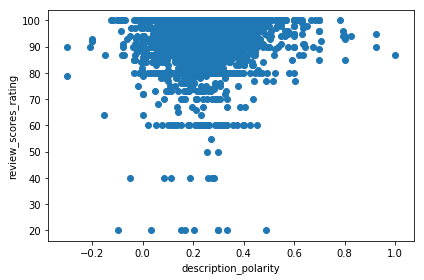

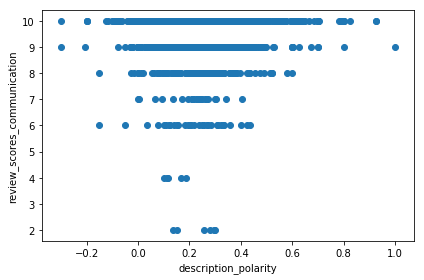

In [23]:
chart4(listings, 'description_polarity', 'review_scores_rating')
chart4(listings, 'description_polarity', 'review_scores_communication')

In [24]:
reviews['comments_polarity'] = reviews['comments'].progress_apply(get_polarity)

100%|██████████| 120787/120787 [00:51<00:00, 2328.13it/s]


In [25]:
worst_reviews = reviews[reviews['comments_polarity'] < -0.5]

In [26]:
for bad_review, bad_score in zip(worst_reviews['comments'], worst_reviews['comments_polarity']):
    if TextBlob(bad_review).detect_language() == 'en':
        # Ignore reviews in foreign languages, which were unfairly given "bad" polarity
        print('{:2.2f}, {}'.format(bad_score, bad_review))

-0.60, cold
-0.60, The house stay really dirty. 
-0.70, Bad place 
-0.67, we had to wait for 4 hour to get the access code for the apartment as the property is managed by a management company with bad service and not by the owner itself. 

the apartment was bad. there was a smell of gas all over the rooms and the bathroom was dirty and smelly.
 
I recommend not to stay in this place
-0.70, It's bad experience, 
-0.65, This apartment is not set up for self-check in, and the lock is very difficult to operate.
-0.91, We had a very bad time in those three days. We all don't like it.
-0.60, Too cold
-0.75, You will not be disappointed and her hospitality is off the chart 
-0.67, It was impossible to contact Sean and also impossible to find the house. We could not sleep there.
-1.00, Worst experience at Airbnb! Attention!
-0.70, Our experience was bad
-0.62, Bad experience! It's just an attic and dirty. The wifi speed is very slow, do not recommend to others.
-1.00, Worst place I have ever s

In [27]:
reviews_listings = pd.merge(listings.drop(['listing_url', 'scrape_id', 'last_scraped'], 1),
                            reviews.drop(['id', 'date', 'reviewer_id', 'reviewer_name'], 1),
                            left_on='id', right_on='listing_id')

In [28]:
reviews_listings['comments_polarity'].describe(percentiles=[0.02, 0.98])

count    120787.000000
mean          0.386414
std           0.216204
min          -1.000000
2%            0.000000
50%           0.379881
98%           0.900389
max           1.000000
Name: comments_polarity, dtype: float64

# Spatial Heterogeneity in Reviews?
It is very hard to see from the plot below if "bad reviews" and "good reviews" have any clumping. I select the lowest 2% and highest 2% of all reviews.

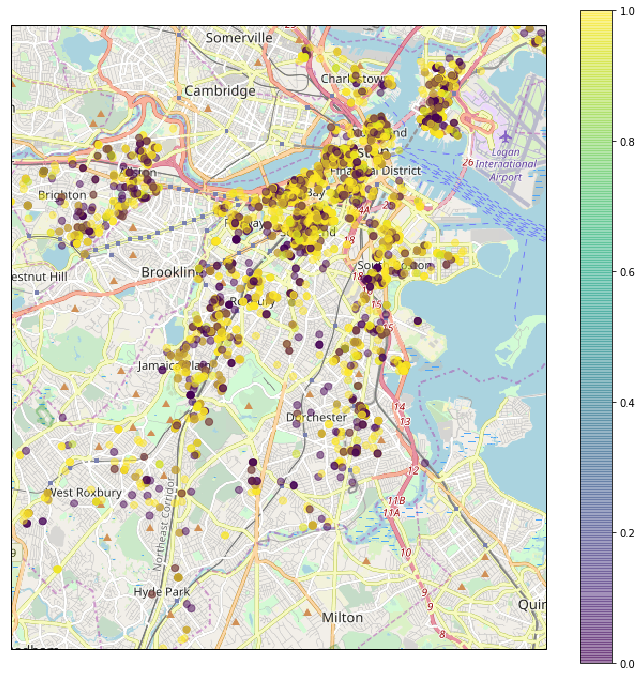

In [29]:
#make_map(reviews_listings[reviews_listings['comments_polarity'] < 0], 'comments_polarity', -1, 1)
#make_map(reviews_listings[reviews_listings['comments_polarity'] > 0.9], 'comments_polarity', -1, 1)
make_map(reviews_listings[(reviews_listings['comments_polarity'] > 0.9) | (reviews_listings['comments_polarity'] < 0)],
         'comments_polarity', 0, 1)

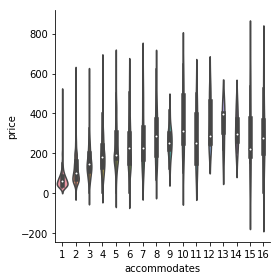

In [42]:
import seaborn as sns
def remove_df_outliers(df, outlier_column, std=3):
    out_col = df[outlier_column]
    return df[np.abs(out_col-out_col.mean())<=(std*out_col.std())]

listings_no_outliers = remove_df_outliers(listings, 'price')
sns.factorplot(data=listings_no_outliers, x='accommodates', y='price', kind='violin')
plt.show()

In [31]:
import holoviews as hv